# imports

In [1]:
from auxilary import tiffVisualize, run_command_line, createExperiment
from processing import binarize, dimCompose, threshold, skeletonize
from segmentation import check_trailmap, stackToFolder, folderToStack, axonSegment
from registration import Registration, regExtract

# getting started!
here we will install the TrailMap axon segmentation model if nesscary and create our expirement

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


The folder 'TRAILMAP' was found in the current directory. Proceed!
Ensured base experiments directory exists: 'H:\axonAtlas2\experiments'
Successfully created experiment folder: 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33'


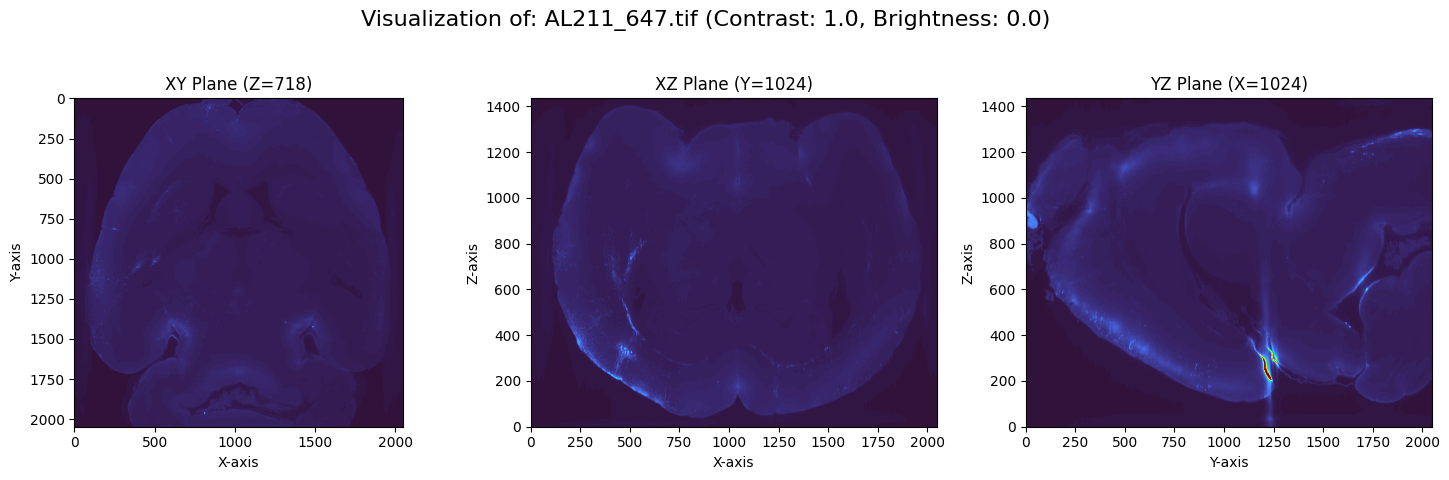

Successfully visualized 'F:\13377319\Liu_anatomy_data_code\TrailMap\AL211_647\AL211_647.tif'.


In [2]:
check_trailmap()
exp_path = createExperiment("alpha")
#exp_path = r"F:\axonAtlas2\experiments\realDataTest_2025-06-17_15-22-57"
axon_stack = r"F:\13377319\Liu_anatomy_data_code\TrailMap\AL211_647\AL211_647.tif"
autof_stack = r""
cell_stack = r""
tiffVisualize(axon_stack, views=3, colormap="turbo")

# axon segmentation
here we will run trailmap and generate our axon segmentation masks

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()



--- Starting TRAILMAP Inference for 'AL211_647.tif' ---
Created temporary directory: 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\trailmap_inference_temp'

Converting 'AL211_647.tif' to frames folder...
Created output folder: 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\trailmap_inference_temp\AL211_647_folder'
Processing 1436 frames from 'F:\13377319\Liu_anatomy_data_code\TrailMap\AL211_647\AL211_647.tif'...
Successfully saved all frames from 'F:\13377319\Liu_anatomy_data_code\TrailMap\AL211_647\AL211_647.tif' to 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\trailmap_inference_temp\AL211_647_folder'.

Running TRAILMAP segmentation command...
Command executed: 'python TRAILMAP/segment_brain_batch.py H:/axonAtlas2/experiments/alpha_2025-06-18_16-19-33/trailmap_inference_temp/AL211_647_folder'
Return Code: 0
STDOUT:
Name: AL211_647_folder

[                                        ]   0%       ETA: Pending        
[                                        ]   0%    

Successfully saved TIFF stack to 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\seg-AL211_647.tif'.

Cleaning up temporary folders...
Deleted original frames folder: 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\trailmap_inference_temp\AL211_647_folder'
Deleted segmented frames folder: 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\trailmap_inference_temp\seg-AL211_647_folder'
Deleted temporary base directory: 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\trailmap_inference_temp'

--- TRAILMAP Inference Completed Successfully! ---
Final segmented TIFF stack saved to: 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\seg-AL211_647.tif'


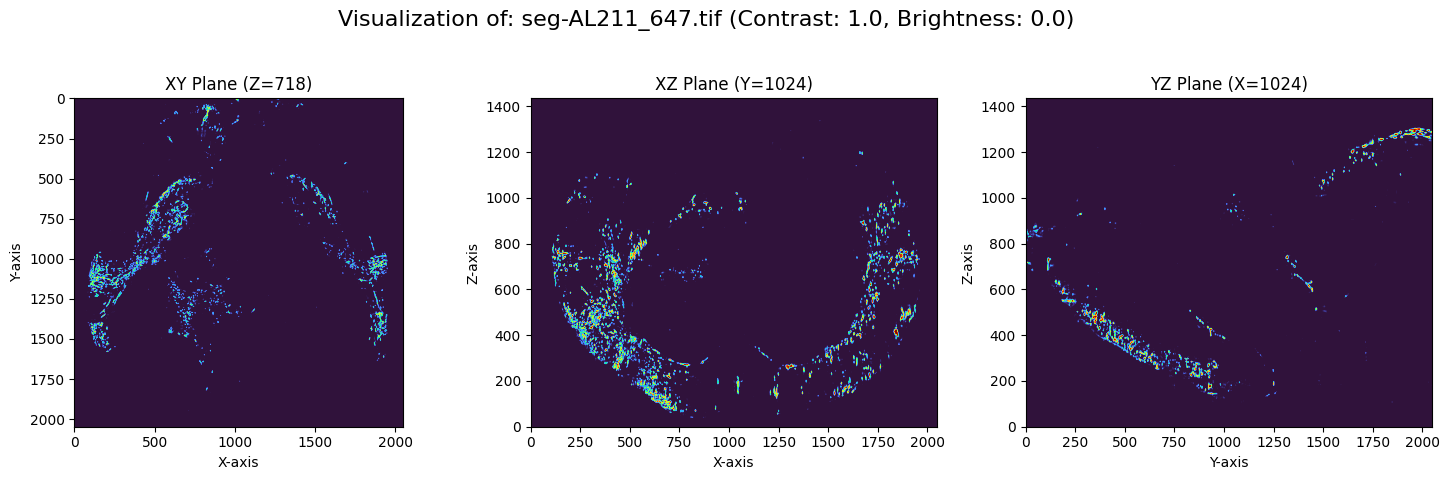

Successfully visualized 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\seg-AL211_647.tif'.


In [3]:

seg_axon_stack = axonSegment(axon_stack, exp_path)
#seg_axon_stack = r"F:\axonAtlas2\experiments\realDataTest_2025-06-17_15-22-57\seg-AL211_647.tif"


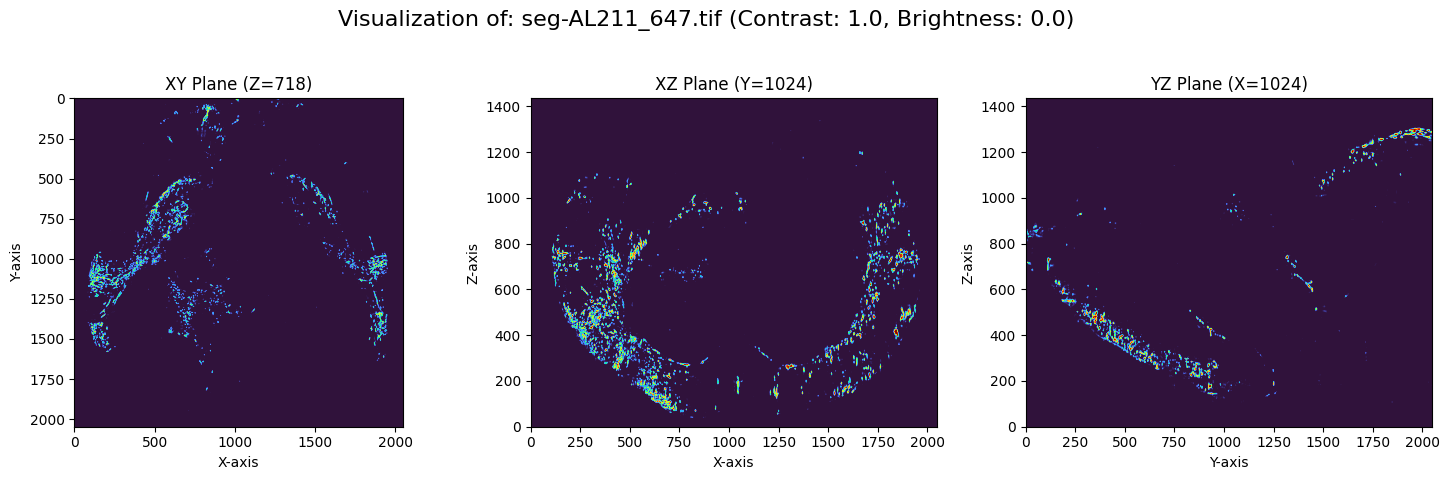

Successfully visualized 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\seg-AL211_647.tif'.


In [10]:
tiffVisualize(seg_axon_stack, views=3, colormap="turbo")

# composition
here we binarize our segmentation masks and compose them with the raw axonal data to prepare for registration|

Binarizing 1436 frames from 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\seg-AL211_647.tif'...
  Processed 100/1436 frames...
  Processed 200/1436 frames...
  Processed 300/1436 frames...
  Processed 400/1436 frames...
  Processed 500/1436 frames...
  Processed 600/1436 frames...
  Processed 700/1436 frames...
  Processed 800/1436 frames...
  Processed 900/1436 frames...
  Processed 1000/1436 frames...
  Processed 1100/1436 frames...
  Processed 1200/1436 frames...
  Processed 1300/1436 frames...
  Processed 1400/1436 frames...
  Processed 1436/1436 frames...
Successfully created binarized TIFF stack: 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\seg-AL211_647_binary.tif'.


<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


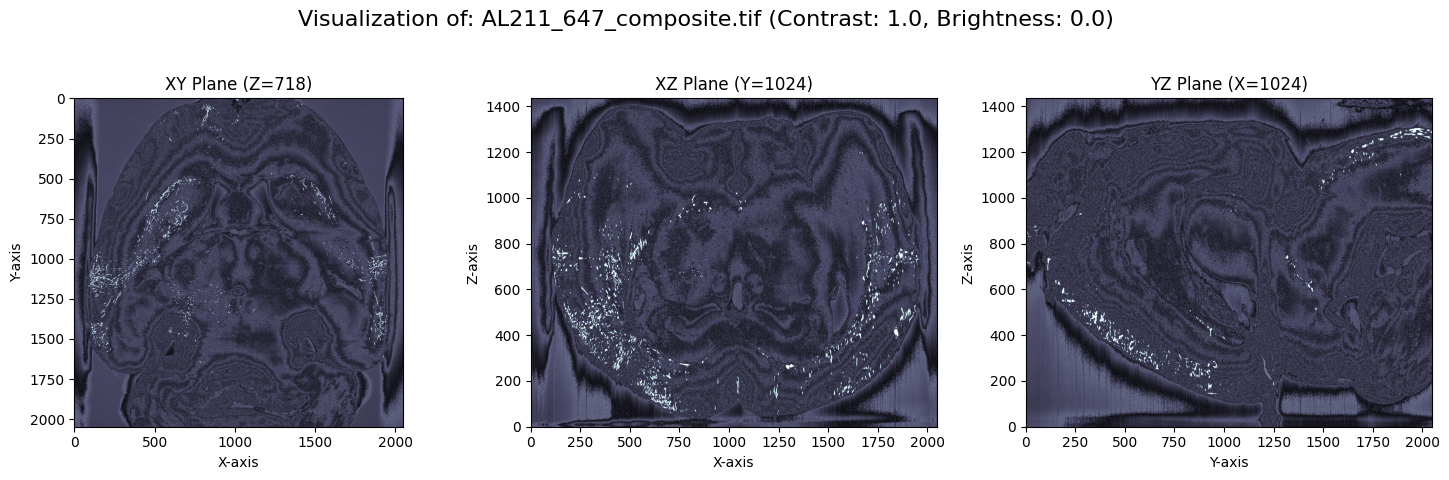

Successfully visualized 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\AL211_647_composite.tif'.


In [4]:
binary = binarize(seg_axon_stack, exp_path)
axon_proc = dimCompose(binary, axon_stack, exp_path, dim_factor = 0.5)
tiffVisualize(axon_proc, views=3, colormap="bone")

# registration
here we register our autoflourescence and composed data to the allen mouse brain atlas

In [5]:
reg_path = Registration(autof_path=axon_proc, v1=10, v2=10, v3=10, orientation="sal", output_dir=exp_path, atlas="allen_mouse_25um")
#reg_path = r"F:\axonAtlas2\experiments\realDataTest_2025-06-17_15-22-57\registration"

Constructed brainreg command: brainreg H:/axonAtlas2/experiments/alpha_2025-06-18_16-19-33/AL211_647_composite.tif H:/axonAtlas2/experiments/alpha_2025-06-18_16-19-33/registration --atlas allen_mouse_25um -v 10 10 10 --orientation sal
Command executed: 'brainreg H:/axonAtlas2/experiments/alpha_2025-06-18_16-19-33/AL211_647_composite.tif H:/axonAtlas2/experiments/alpha_2025-06-18_16-19-33/registration --atlas allen_mouse_25um -v 10 10 10 --orientation sal'
Return Code: 0
STDOUT:
2025-06-18 17:06:11 PM INFO     2025-06-18 17:06:11 PM - INFO - fancylog.py:321
                                MainProcess fancylog.py:321 -                  
                                Starting logging                               
                       INFO     2025-06-18 17:06:11 PM - INFO - fancylog.py:322
                                MainProcess fancylog.py:322 -                  
                                Not logging multiple processes                 
                       INFO     2025-

['H:\\axonAtlas2\\experiments\\alpha_2025-06-18_16-19-33\\registration\\downsampled.tiff', 'H:\\axonAtlas2\\experiments\\alpha_2025-06-18_16-19-33\\registration\\registered_atlas.tiff', None, 'H:\\axonAtlas2\\experiments\\alpha_2025-06-18_16-19-33\\registration\\downsampled_standard.tiff', None]


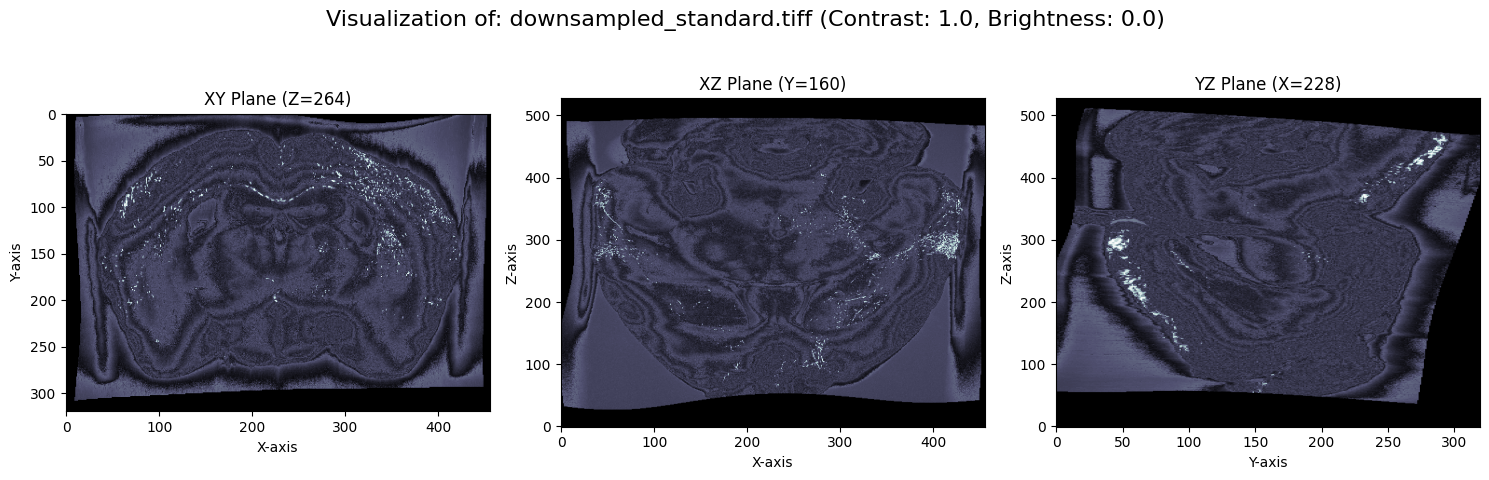

Successfully visualized 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\registration\downsampled_standard.tiff'.


In [6]:
reg_list = regExtract(reg_path)
print(reg_list)
downsampled_standard_autof = reg_list[3]
tiffVisualize(downsampled_standard_autof, views=3, colormap="bone")

# postprocessing
here we use thresholding to extract the exon segmentation masks in the atlas space

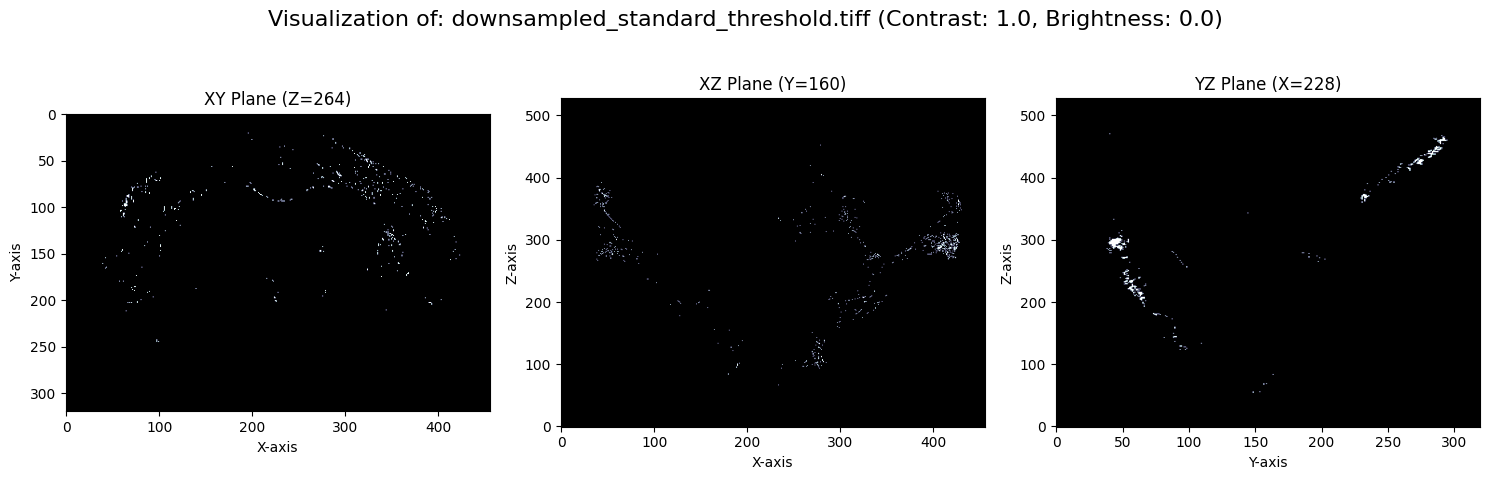

Successfully visualized 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\downsampled_standard_threshold.tiff'.


In [7]:
downsampled_standard_autof_threshold = threshold(downsampled_standard_autof, exp_path, threshold = 200)
tiffVisualize(downsampled_standard_autof_threshold, views=3, colormap="bone")

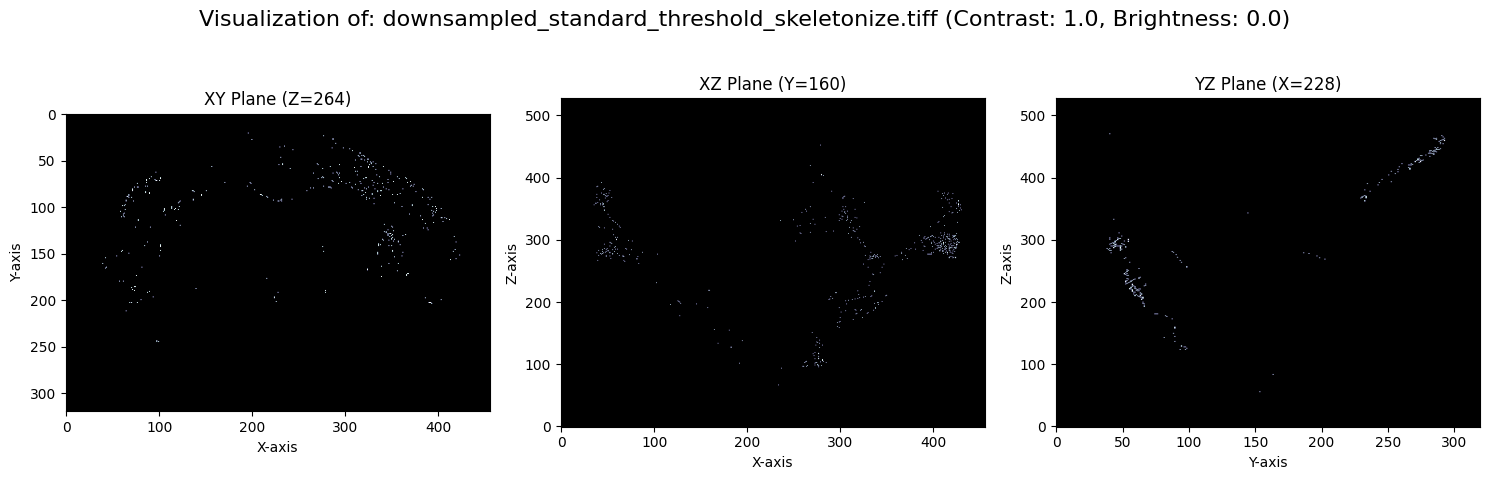

Successfully visualized 'H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33\downsampled_standard_threshold_skeletonize.tiff'.


In [8]:
downsampled_standard_autof_skeleton = skeletonize(downsampled_standard_autof_threshold, exp_path)
tiffVisualize(downsampled_standard_autof_skeleton, views=3, colormap="bone")

# congrats! you finished part1 switch from the trailmmap_env conda enviorment to the BrainRender enviorment and then move over to the visualization notebook to turn these into 3D

In [9]:
print(exp_path)

H:\axonAtlas2\experiments\alpha_2025-06-18_16-19-33
